# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from Abushacra_api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 632


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | greenville
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | saipan
Processing Record 5 of Set 1 | salalah
Processing Record 6 of Set 1 | aasiaat
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | diego martin
Processing Record 9 of Set 1 | longyearbyen
Processing Record 10 of Set 1 | perth
Processing Record 11 of Set 1 | san antonio de pale
Processing Record 12 of Set 1 | bilibino
Processing Record 13 of Set 1 | kulia village
City not found. Skipping...
Processing Record 14 of Set 1 | anacapri
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | grand falls-windsor
Processing Record 19 of Set 1 | nambucca heads
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | nikol

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          600
Lat           600
Lng           600
Max Temp      600
Humidity      600
Cloudiness    600
Wind Speed    600
Country       600
Date          600
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  Wind Speed  \
0      albany  42.6001  -73.9662      2.35        90         100        0.45   
1  greenville  35.6127  -77.3663     13.02        58           0        3.60   
2    waitangi -43.9535 -176.5597     16.57        84          14        1.34   
3      saipan  15.1355  145.7010     28.39        69          40        8.23   
4     salalah  17.0151   54.0924     28.09        21          34        3.37   

  Country        Date  
0      US  1708668421  
1      US  1708668329  
2      NZ  1708668562  
3      MP  1708668562  
4      OM  1708668563

In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0            albany  42.6001  -73.9662      2.35        90         100   
1        greenville  35.6127  -77.3663     13.02        58           0   
2          waitangi -43.9535 -176.5597     16.57        84          14   
3            saipan  15.1355  145.7010     28.39        69          40   
4           salalah  17.0151   54.0924     28.09        21          34   

         Wind Speed Country        Date  
City_ID                                  
0              0.45      US  1708668421  
1              3.60      US  1708668329  
2              1.34      NZ  1708668562  
3              8.23      MP  1708668562  
4              3.37      OM  1708668563

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

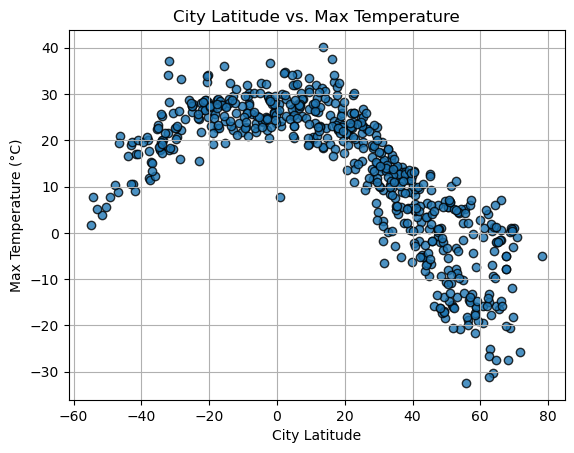

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (Â°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

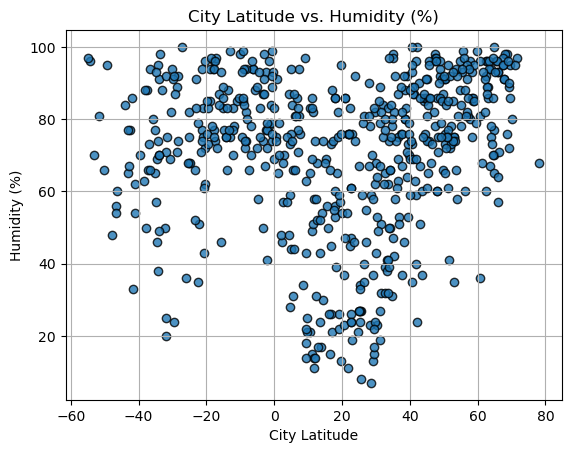

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

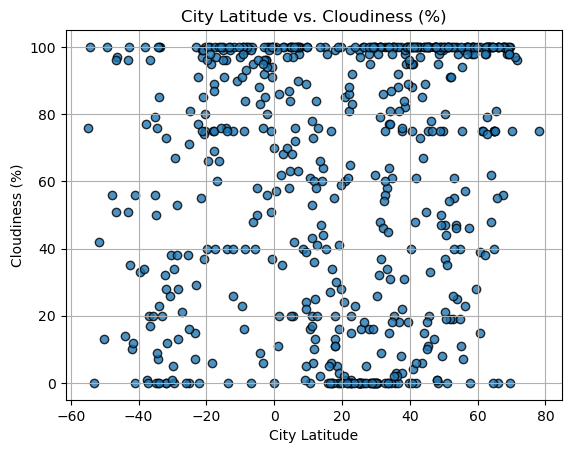

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

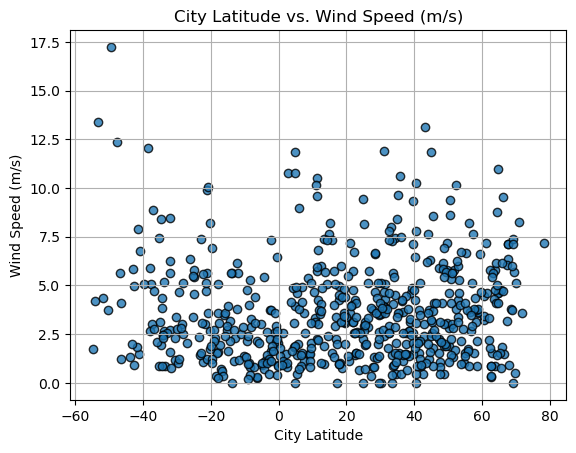

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (m/s)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linregressplot(x_values, y_values, x_label, y_label, eq_x, eq_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    #Get regression values
    regress_values = x_values * slope + intercept
    
    #Creating line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Creating the plotting paramaters
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")

    #Annotate the plot
    plt.annotate(line_eq,(eq_x , eq_y),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    #Print r-value
    print(f'The r-value is: {rvalue}')

    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                  
0            albany  42.6001  -73.9662      2.35        90         100   
1        greenville  35.6127  -77.3663     13.02        58           0   
3            saipan  15.1355  145.7010     28.39        69          40   
4           salalah  17.0151   54.0924     28.09        21          34   
5           aasiaat  68.7098  -52.8699    -20.53        98         100   

         Wind Speed Country        Date  
City_ID                                  
0              0.45      US  1708668421  
1              3.60      US  1708668329  
3              8.23      MP  1708668562  
4              3.37      OM  1708668563  
5              3.81      GL  1708668564

In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  \
City_ID                                                               
2                   waitangi -43.9535 -176.5597     16.57        84   
6                       lebu -37.6167  -73.6500     11.79        88   
9                      perth -31.9333  115.8333     37.23        25   
10       san antonio de pale  -1.4014    5.6325     27.80        78   
14             blackmans bay -43.0167  147.3167     19.07        65   

         Cloudiness  Wind Speed Country        Date  
City_ID                                              
2                14        1.34      NZ  1708668562  
6                 1        5.06      CL  1708668564  
9                 0        5.66      AU  1708668341  
10              100        2.55      GQ  1708668566  
14               96        5.87      AU  1708668569

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8589203646598975


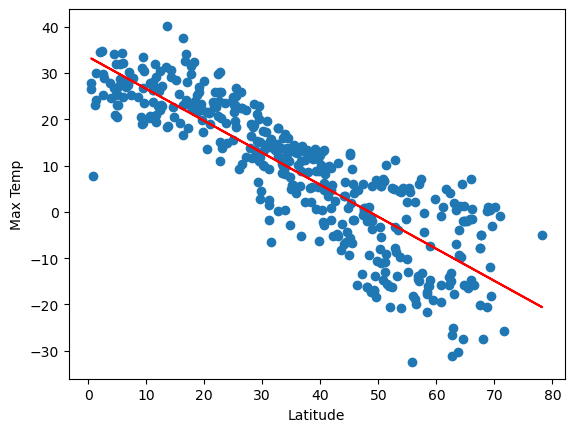

In [15]:
# Linear regression on Northern Hemisphere
linregressplot(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp",5,-40)

The r-value is: 0.6653817378505911


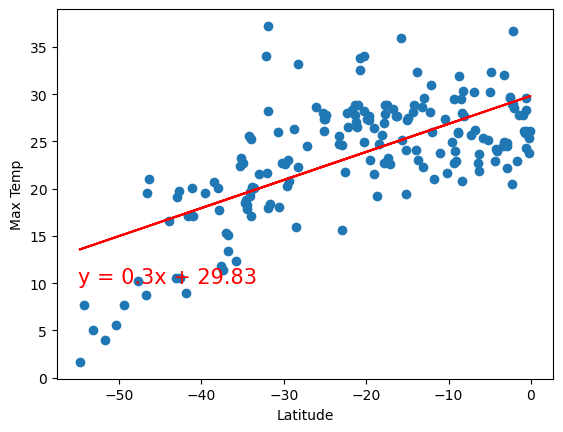

In [16]:
# Linear regression on Southern Hemisphere
linregressplot(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp", -55, 10)

**Discussion about the linear relationship:** 
- There seems to be a very strong negative correlation between latitude and maximum temperature for the Northern Hemisphere, and a less-strong positive correlation in the Southern Hemisphere. Both of these relationships however tell us that maximum temperature goes up the closer to the equator you get.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4709130086139749


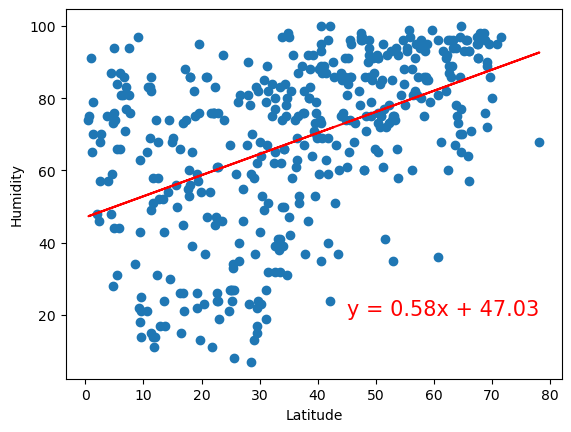

In [17]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity", 45, 20)

The r-value is: 0.2586736601500229


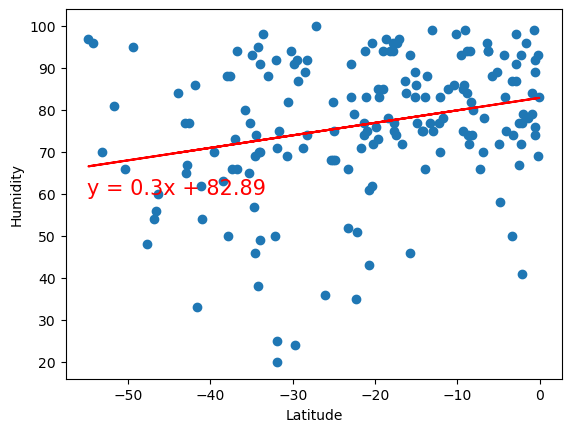

In [18]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity", -55, 60)

**Discussion about the linear relationship:**
- There seems to be a positive correlation for both hemispheres between humidity and latitude. This seems to indicate that the higher the latitude, the higher the observed humidity. Conventional wisdom would tell us that the relationships should be inverted, like in the relationships between temperature and latitude. This could be a result of the randomized sampling of datapoints in addition to the fact that in the northern hemisphere, there is much more landmass the further away you get from the equator. This could mean that the results are grouped to a few certain countries and continents below the equator as opposed to the entirety of the hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25292007193036925


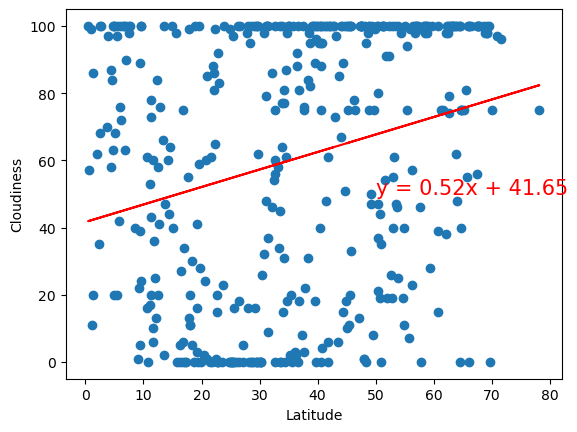

In [19]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", 50, 50)

The r-value is: 0.36249211945205045


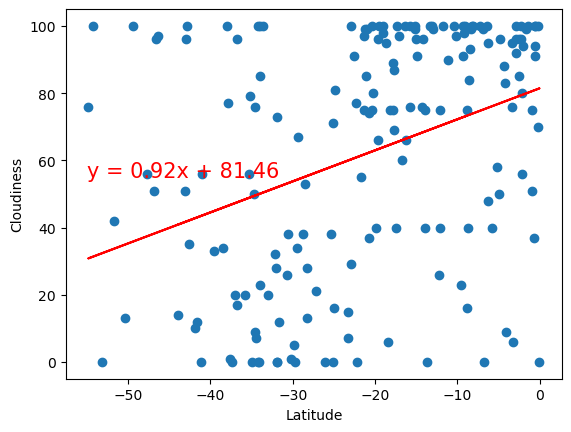

In [20]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness", -55, 55)

**Discussion about the linear relationship:** 
- As with the humidity relationships, there is a weak positive correlation between cloudiness and latitude for both the Northern and Southern hemispheres. The same concerns about the randomness of the data and the possible explination of landmass being concentrated in the higher parts of the southern hemisphere apply to these relationships. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0867003655168765


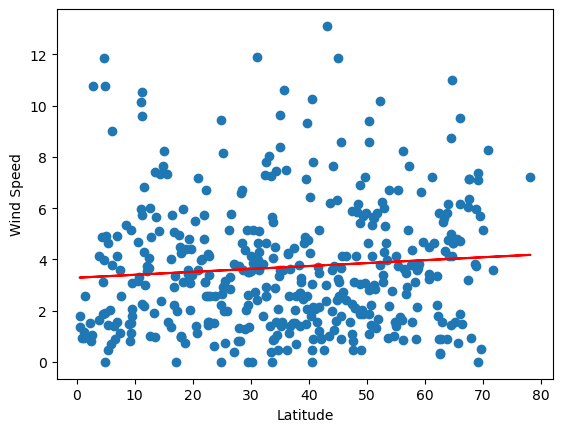

In [21]:
# Northern Hemisphere
linregressplot(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", 5, 15)

The r-value is: -0.3714513192352031


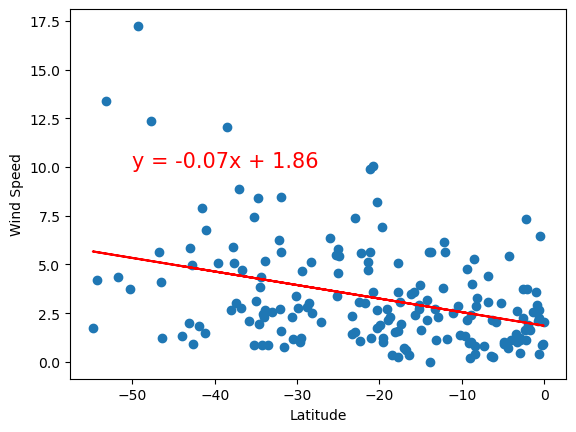

In [22]:
# Southern Hemisphere
linregressplot(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed", -50, 10)

**Discussion about the linear relationship:**
- There seems to be a very weak positive correlation between wind speed and latitude in the Northern Hemisphere, and a weak negative correlation between wind speed and latitude in the Southern Hemisphere. Knowledge of weather patterns and the Coriolis Force challenges the relationship found for the Northern Hemisphere data as the Coriolis Force suggests that wind speed should be increasing the closer to the equator.